In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [2]:
#import dataset from Resources Folder
file = "Resources/diabetes_data_cleaned.csv"
df = pd.read_csv(file)

In [ ]:
# Separate the features (X) and target (y) variable
X = df.drop('DiabetesDiagnosis', axis=1)
y = df['DiabetesDiagnosis']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define pipelines for each model
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

decision_tree_pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

random_forest_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier(random_state=42))
])

extra_trees_pipeline = Pipeline([
    ('extra_trees', ExtraTreesClassifier(random_state=42))
])

gradient_boosting_pipeline = Pipeline([
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
])

adaboost_pipeline = Pipeline([
    ('adaboost', AdaBoostClassifier(random_state=42))
])


# Dictionary of pipelines for easier iteration
pipelines = {
    'Logistic Regression': log_reg_pipeline,
    'SVM': svm_pipeline,
    'Decision Tree': decision_tree_pipeline,
    'K-Nearest Neighbors': knn_pipeline,
    'Random Forest': random_forest_pipeline,
    'Extremely Random Trees': extra_trees_pipeline,
    'Gradient Boosting': gradient_boosting_pipeline,
    'AdaBoost': adaboost_pipeline
}


In [5]:
# Train each pipeline and evaluate accuracy
for model_name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)
    
    # Print the results
    print(f"{model_name} Training Accuracy: {train_accuracy:.3f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.3f}")


Logistic Regression Training Accuracy: 0.747
Logistic Regression Test Accuracy: 0.746
SVM Training Accuracy: 0.747
SVM Test Accuracy: 0.745
Decision Tree Training Accuracy: 0.972
Decision Tree Test Accuracy: 0.658
K-Nearest Neighbors Training Accuracy: 0.798
K-Nearest Neighbors Test Accuracy: 0.716
Random Forest Training Accuracy: 0.972
Random Forest Test Accuracy: 0.728
Extremely Random Trees Training Accuracy: 0.972
Extremely Random Trees Test Accuracy: 0.712
Gradient Boosting Training Accuracy: 0.754
Gradient Boosting Test Accuracy: 0.753


c:\Users\14192\Apps\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Training Accuracy: 0.749
AdaBoost Test Accuracy: 0.749


In [ ]:
# Get feature importances from the trained model
importances = random_forest_pipeline.named_steps['random_forest'].feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head(10)

,Feature,Importance
16,HighBloodPressure,0.352286
11,GeneralHealth,0.288367
4,BodyMassIndex,0.118122
0,AgeMean,0.103650
2,HighCholesterol,0.068579
14,DifficultyWalking,0.017041
6,HeartDiseaseHistory,0.016053
10,HeavyAlcoholConsumption,0.011486
3,CholesterolCheck,0.009138
1,Gender,0.007525


In [10]:
# Get coefficients from the trained model
coefficients = log_reg_pipeline.named_steps['log_reg'].coef_[0]

# Create a DataFrame to display feature coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df.head(10)

,Feature,Coefficient
11,GeneralHealth,0.684792
4,BodyMassIndex,0.524526
0,AgeMean,0.416036
16,HighBloodPressure,0.381787
2,HighCholesterol,0.288683
3,CholesterolCheck,0.204483
1,Gender,0.107552
6,HeartDiseaseHistory,0.095148
14,DifficultyWalking,0.076808
15,StrokeHistory,0.042244


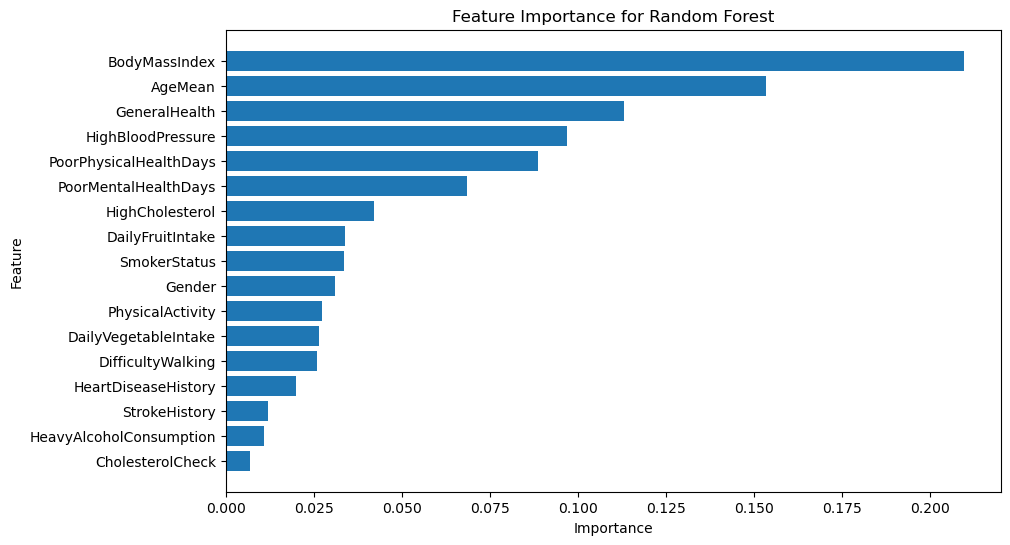

In [11]:
import matplotlib.pyplot as plt

# Get feature importances
importances = random_forest_pipeline.named_steps['random_forest'].feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.gca().invert_yaxis()  # Most important at the top
plt.show()

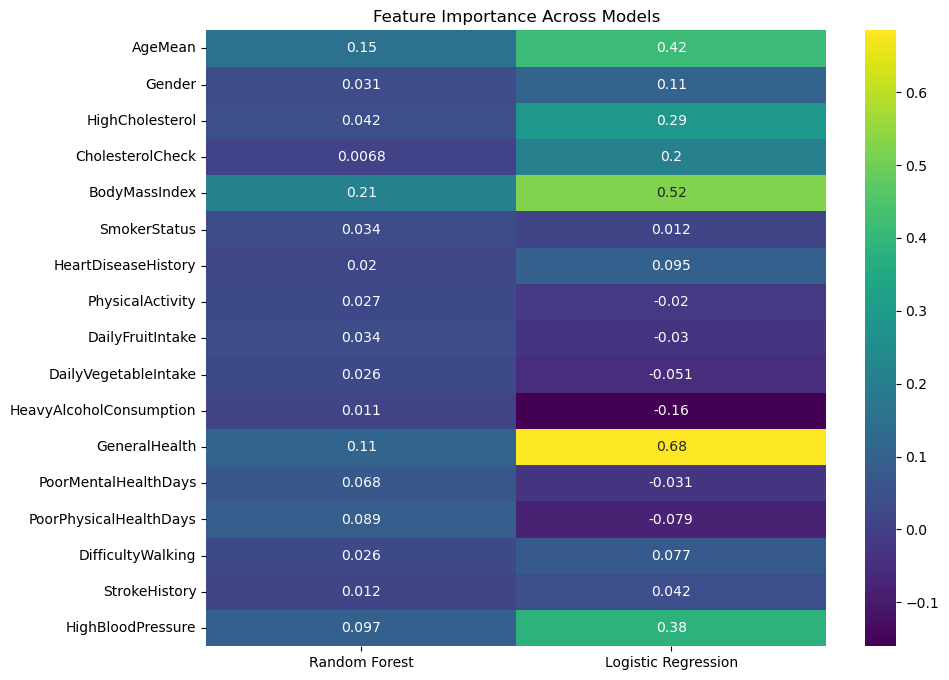

In [13]:
import seaborn as sns

# Combine feature importances from multiple models into a single DataFrame
feature_importance_matrix = pd.DataFrame({
    'Random Forest': random_forest_pipeline.named_steps['random_forest'].feature_importances_,
    'Logistic Regression': coefficients,
    # Add more models if needed
}, index=X.columns)

# Plot as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(feature_importance_matrix, annot=True, cmap='viridis')
plt.title('Feature Importance Across Models')
plt.show()
